0.8576


D:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\Post\notebook\mod.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1.loc[:, column] = filtered_df1.loc[:, column] / scale
C:\Users\tongjiachi\AppData\Local\Temp\ipykernel_25752\180659552.py:143: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()  # Or use fig.write_image("output.png") to save the figure as an image


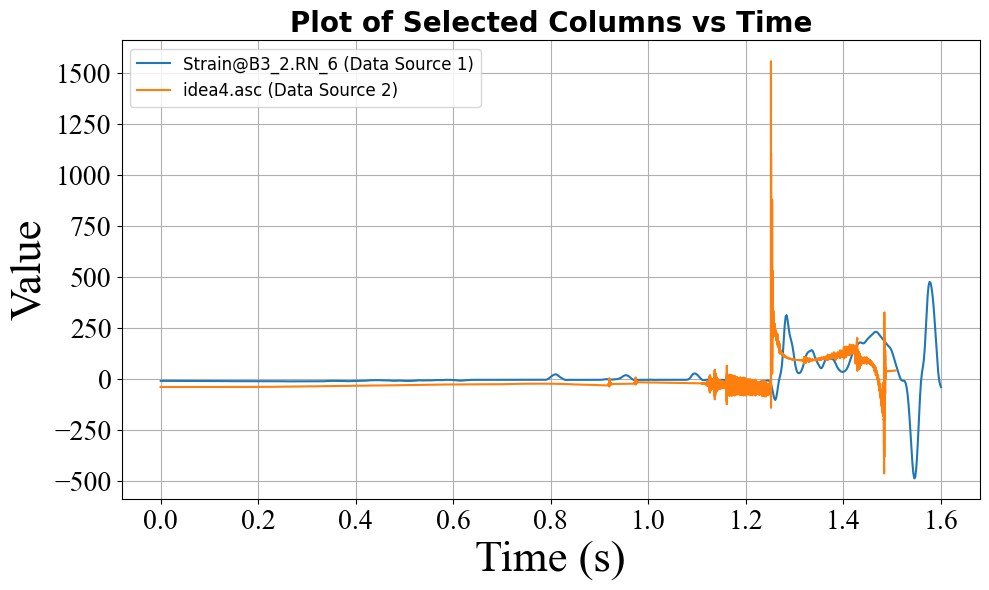

In [8]:
import mod as dp
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
def load_data(path):
    df = pd.read_csv(path)
    return df

def filter_data1(df1, start_time1, end_time1, selected_columns1, data_amount):
    filtered_df1 = df1.loc[(df1['t '] >= start_time1) & (df1['t '] <= end_time1)]
    selected_columns1 = selected_columns1[:data_amount]
    return filtered_df1, selected_columns1

def filter_data2( df2, start_time2, end_time2,  selected_columns2, data_amount):
    filtered_df2 = df2.loc[(df2['Time'] >= start_time2) & (df2['Time'] <= end_time2)]
    selected_columns2 = selected_columns2[:data_amount]
    return  filtered_df2,  selected_columns2


def apply_scaling(filtered_df1, selected_columns1):
    for column in selected_columns1:
        scale = dp.scaling_dict.get(column, 1)
        filtered_df1.loc[:, column] = filtered_df1.loc[:, column] / scale
        print(scale)
    return filtered_df1

def apply_smoothing(filtered_df1, selected_columns1, smoothing_method, window_sizes1):
    if smoothing_method == 'Rolling Mean':
        for column, window_size in zip(selected_columns1, window_sizes1):
            filtered_df1.loc[:, column] = filtered_df1.loc[:, column].rolling(window=window_size, min_periods=1).mean()

    elif smoothing_method == 'Fourier Filter':
        for column, window_size in zip(selected_columns1, window_sizes1):
            signal = filtered_df1[column].values
            fft_vals = fft(signal)
            fft_vals[window_size:] = 0  # Zero out high frequencies
            filtered_signal = np.real(ifft(fft_vals))
            filtered_df1.loc[:, column] = filtered_signal
    return filtered_df1



def create_figure1_matplotlib(ax, filtered_df1, selected_columns1, start_time1):
    textstyle = {'family': 'Times New Roman', 'size': 32}
    tick_fontsize = 20
    tick_font = 'Times New Roman'
    
    for column in selected_columns1:
        ax.plot(filtered_df1['t '] - start_time1, filtered_df1[column], label=f'{column} (Data Source 1)')
    
    ax.set_title('Plot of Selected Columns vs Time', fontsize=20, fontweight='bold')
    ax.set_xlabel('Time (s)', fontdict=textstyle)
    ax.set_ylabel('Value', fontdict=textstyle)
    
    
    ax.grid(True)
    
    plt.xticks(fontsize=tick_fontsize, fontfamily=tick_font)
    plt.yticks(fontsize=tick_fontsize, fontfamily=tick_font)
    
    plt.tight_layout()
    
    return ax

def create_figure2_matplotlib(ax, filtered_df2, selected_columns2):
    textstyle = {'family': 'Times New Roman', 'size': 32}
    tick_fontsize = 20
    tick_font = 'Times New Roman'
    
    for column in selected_columns2:
        ax.plot(filtered_df2['Time'], filtered_df2[column], label=f'{column} (Data Source 2)')
    
    ax.legend(fontsize=12, loc='upper left')  # Customize legend as needed
    
    return ax

def create_figure_matplotlib():
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.set_facecolor('white')
    return fig, ax


# Define paths
path1 = r"D:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\MR_door (run 29)_out2.csv"
path2 = r"D:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\ic3_exprcontace\GFO_MF U3_export.csv"
path3 = r"D:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\ic4\GFO_MF U3_export.csv"
path4 = r"D:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\ic3\GCONMR U6_export.csv"
path5 = r"D:\OneDrive\Articles\10.Working\[D21][20211009]ContactMechanics\MBD.jl\plots\adams2\ic4\GCONMR U6_export.csv"
# Load data
df1= load_data(path1)
df2= load_data(path2)
df3= load_data(path3)
df4= load_data(path4)
df5= load_data(path5)

# Define parameters
selected_columns1 = ['Strain@B3_2.RN_6']
start_time1 = 98.4
end_time1 = 100
selected_columns2 = ['clea3.asc']  # Replace with actual column names
selected_columns2 = ['clea3_07-29-2024_1.asc'] 

selected_columns3 = ['clea4.asc']  # Replace with actual column names
selected_columns4 = ['idea3.asc']  # Replace with actual column names
selected_columns5 = ['idea4.asc']  # Replace with actual column names
start_time2 = 0
end_time2 = 2
data_amount = 8
smoothing_method = 'Fourier Filter'
smoothing_method = 'Rolling Mean'
smoothing_method = ''
window_sizes1 = [1]*9
window_sizes2 = [15]*9
window_sizes3 = [15]*9
window_sizes4 = [20]*9
window_sizes5 = [2000]*9

# Filter data
filtered_df1, selected_columns1 = filter_data1(df1, start_time1, end_time1,  selected_columns1, data_amount)
filtered_df2, selected_columns2 = filter_data2(df2, start_time2, end_time2,  selected_columns2, data_amount)
filtered_df3, selected_columns3 = filter_data2(df3, start_time2, end_time2,  selected_columns3, data_amount)
filtered_df4, selected_columns4 = filter_data2(df4, start_time2, end_time2,  selected_columns4, data_amount)
filtered_df5, selected_columns5 = filter_data2(df5, start_time2, end_time2,  selected_columns5, data_amount)
# Apply scaling
filtered_df1 = dp.apply_scaling(filtered_df1, selected_columns1)

# Apply smoothing
filtered_df1 = apply_smoothing(filtered_df1, selected_columns1,  smoothing_method, window_sizes1)
filtered_df2 = apply_smoothing(filtered_df2, selected_columns2, smoothing_method,  window_sizes2)
filtered_df3 = apply_smoothing(filtered_df3, selected_columns3, smoothing_method,  window_sizes2)
filtered_df4 = apply_smoothing(filtered_df4, selected_columns4, smoothing_method,  window_sizes4)
filtered_df5 = apply_smoothing(filtered_df5, selected_columns5, smoothing_method,  window_sizes4)
# Create figure
fig,ax = create_figure_matplotlib()
ax = create_figure1_matplotlib(ax, filtered_df1, selected_columns1, start_time1)

#ax = create_figure2_matplotlib(ax, filtered_df4, selected_columns4)
ax = create_figure2_matplotlib(ax, filtered_df5, selected_columns5)
#ax = create_figure2_matplotlib(ax, filtered_df2, selected_columns2)
#ax = create_figure2_matplotlib(ax, filtered_df3, selected_columns3)
# Show the figure (or save it)
fig.show()  # Or use fig.write_image("output.png") to save the figure as an image


In [2]:
print(filtered_df1)

              t   Strain@B1_1.RN_6  Strain@B2_1.RN_6  Strain@B2_2.RN_6  \
50381   98.40039          54.88447         -2.681833         -5.749956   
50382   98.40234          54.88447         -2.774159         -5.842011   
50383   98.40430          54.97701         -2.774159         -5.842011   
50384   98.40625          54.97701         -2.774159         -5.842011   
50385   98.40820          54.97701         -2.866486         -5.842011   
...          ...               ...               ...               ...   
51196   99.99219          71.26338         73.580170         57.676480   
51197   99.99414          74.68722         83.459150         65.225050   
51198   99.99609          74.87229         94.907680         73.786240   
51199   99.99805          72.92903        105.617600         81.979210   
51200  100.00000          70.61562        112.726800         88.331050   

       Strain@B2_3.RN_6  Strain@B2_4.RN_6  Strain@B3_1.RN_6  Strain@B3_2.RN_6  \
50381        -155.61820       